# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        example_data = train_data[i]
        example_label = newsgroups_train.target_names[train_labels[i]]
        print("Example " + str(i+1) + ":")
        print("Label: " + str(example_label))
        print("Data: " + example_data)
### STUDENT END ###
P1()

Example 1:
Label: comp.graphics
Data: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
Example 2:
Label: talk.religion.misc
Data: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corrup

### Part 2:

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
### STUDENT START ###
    print("Part A")
    vectorizer_a = CountVectorizer()
    A = vectorizer_a.fit_transform(train_data)
    shape_a = A.shape
    print("The vocabulary size is {0} words.".format(shape_a[1]))
    non_zero_a = []
    for i in range(shape_a[0]):
        non_zero = A[i].nnz
        non_zero_a.append(non_zero)
    mean_nz_a = round(sum(non_zero_a) / len(non_zero_a),2)
    total_nz_a = A.nnz
    frac_nz_a = round(total_nz_a / (shape_a[0]*shape_a[1]),5)
    print("The average number of non-zero features per example is {0} for {1} examples. The fraction of non-zero entries in the matrix is {2}.\n"\
          .format(mean_nz_a, shape_a[0], frac_nz_a))

    
    print("Part B")
    words_b = vectorizer_a.get_feature_names()
    print("First word: {0}".format(words_b[0]))
    print("Last word: {0}\n".format(words_b[len(words_b)-1]))
    
    print("Part C")
    vocab = ["atheism", "graphics", "space", "religion"]
    vectorizer_c = CountVectorizer(vocabulary = vocab)
    C = vectorizer_c.fit_transform(train_data)
    shape_c = C.shape
    print("Training vector shape test passed: {0}".format((shape_c[0]==shape_a[0]) & (shape_c[1]==len(vocab))))
    non_zero_c = []
    for i in range(shape_c[0]):
        non_zero = C[i].nnz
        non_zero_c.append(non_zero)
    mean_nz_c = round(sum(non_zero_c) / len(non_zero_c),2)
    print("The average number of non-zero features per example is {0} for {1} examples.\n"\
          .format(mean_nz_c, shape_c[0]))
    
    print("Part D")
    vectorizer_d = CountVectorizer(ngram_range=(2,3),analyzer='char')
    D = vectorizer_d.fit_transform(train_data)
    shape_d = D.shape
    print("With bigram and trigram character features, the vocabulary size is {}.\n".format(shape_d[1]))
    
    print("Part E")
    vectorizer_e = CountVectorizer(min_df=10)
    E = vectorizer_e.fit_transform(train_data)
    shape_e = E.shape
    print("With a minimum of 10 documents, the vocabulary size is {0} words.\n".format(shape_e[1]))
    
    print("Part F")
    vectorizer_f = CountVectorizer()
    F = vectorizer_f.fit_transform(dev_data)
    words_f = vectorizer_f.get_feature_names()
    contained = [x for x in words_f if x in words_b]
    contained_pct = round(len(contained)/len(words_f),2)
    print("Fraction of dev vocabulary missing from training vocabulary: {0}".format(1-contained_pct))
    
### STUDENT END ###
P2()

Part A
The vocabulary size is 26879 words.
The average number of non-zero features per example is 96.71 for 2034 examples. The fraction of non-zero entries in the matrix is 0.0036.

Part B
First word: 00
Last word: zyxel

Part C
Training vector shape test passed: True
The average number of non-zero features per example is 0.27 for 2034 examples.

Part D
With bigram and trigram character features, the vocabulary size is 35478.

Part E
With a minimum of 10 documents, the vocabulary size is 3064 words.

Part F
Fraction of dev vocabulary missing from training vocabulary: 0.25


### Part 3:

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score with average="weighted") for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

* Why doesn't nearest neighbors work well for this problem?
* Any ideas why logistic regression doesn't work as well as Naive Bayes?
* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [5]:
def P3():
    ### STUDENT START ###

    ## Create bag of words features
    vectorizer_train = CountVectorizer()
    train = vectorizer_train.fit_transform(train_data).toarray()
    train_words = vectorizer_train.get_feature_names()

    ## Apply feature extraction to dev data, using training vocabulary
    vectorizer_dev = CountVectorizer(vocabulary = train_words)
    dev = vectorizer_dev.fit_transform(dev_data).toarray()
    
    ## Train KNN Models for various values of k
    print("KNN Model")
    k_list = [i for i in range(1, 10)]
    knn_f1_list = []
    for k in k_list:
        #print(k)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train, train_labels)
        label_pred = knn.predict(dev)
        F1 = metrics.f1_score(dev_labels,label_pred,average="weighted")
        print("k = {0}  . . . . .  F1 = {1}".format(k, round(F1, 4)))
        knn_f1_list.append(F1)
    
    ## Determine and print optimized k based on F1 score
    max_knn_f1 = max(knn_f1_list)
    opt_knn_k = k_list[knn_f1_list.index(max_knn_f1)]
    print("Optimized k = {0}  . . . . .  Max F1 = {1}\n".format(opt_knn_k, max_knn_f1))
    
    ## Train Naive Bayes Models for various alpha values
    print("Naive Bayes Model")
    alpha_list = [0.00000001, 0.001, 0.010, 0.050, 0.100, 0.500, 1.000, 2.000]
    nb_f1_list = []
    for a in alpha_list:
        NB = MultinomialNB(alpha = a)
        NB.fit(train, train_labels)
        label_pred = NB.predict(dev)
        F1 = metrics.f1_score(dev_labels,label_pred,average="weighted")
        print("a = {0}  . . . . .  F1 = {1}".format(a, round(F1, 4)))
        nb_f1_list.append(F1)
    
    ## Determine and print optimized alpha value based on F1 score
    max_a_f1 = max(nb_f1_list)
    opt_nb_a = alpha_list[nb_f1_list.index(max_a_f1)]
    print("Optimized alpha = {0}  . . . . .  Max F1 = {1}\n".format(opt_nb_a, max_a_f1))
    
    ## Train logistic regression with various values for c
    print("Logistic Regression Model")
    c_list = [0.00001, 0.001, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]
    logreg_f1_list = []
    for c in c_list:
        clf = LogisticRegression(penalty='l2', C=c, solver='liblinear', multi_class='auto').fit(train, train_labels)
        label_pred = clf.predict(dev)
        F1 = metrics.f1_score(dev_labels, label_pred, average="weighted")
        print("C = {0}  . . . . .  F1 = {1}".format(c, round(F1, 4)))
        logreg_f1_list.append(F1)
    
    ## Determine optimized c value based on F1 score
    max_c_f1 = max(logreg_f1_list)
    opt_clf_c = c_list[logreg_f1_list.index(max_c_f1)]
    print("Optimized C = {0}  . . . . .  Max F1 = {1}\n".format(opt_clf_c, max_c_f1))

    ### STUDENT END ###
P3()

KNN Model
k = 1  . . . . .  F1 = 0.3947
k = 2  . . . . .  F1 = 0.4004
k = 3  . . . . .  F1 = 0.423
k = 4  . . . . .  F1 = 0.4406
k = 5  . . . . .  F1 = 0.4428
k = 6  . . . . .  F1 = 0.4579
k = 7  . . . . .  F1 = 0.466
k = 8  . . . . .  F1 = 0.4514
k = 9  . . . . .  F1 = 0.4557
Optimized k = 7  . . . . .  Max F1 = 0.46603879404544657

Naive Bayes Model
a = 1e-08  . . . . .  F1 = 0.7493
a = 0.001  . . . . .  F1 = 0.7703
a = 0.01  . . . . .  F1 = 0.7752
a = 0.05  . . . . .  F1 = 0.7859
a = 0.1  . . . . .  F1 = 0.7903
a = 0.5  . . . . .  F1 = 0.7863
a = 1.0  . . . . .  F1 = 0.7777
a = 2.0  . . . . .  F1 = 0.769
Optimized alpha = 0.1  . . . . .  Max F1 = 0.7903052385098862

Logistic Regression Model
C = 1e-05  . . . . .  F1 = 0.3652
C = 0.001  . . . . .  F1 = 0.6193
C = 0.1  . . . . .  F1 = 0.6966
C = 0.5  . . . . .  F1 = 0.7101
C = 1.0  . . . . .  F1 = 0.6961
C = 2.0  . . . . .  F1 = 0.694
C = 10.0  . . . . .  F1 = 0.6866
C = 100.0  . . . . .  F1 = 0.684
Optimized C = 0.5  . . . . .  Max F

ANSWER: Nearest Neighbors doesn't work well for this problem because each data point's feature vector is inherently sparse. This means that all data points are very far from each other. Additionally, since there are so many features (each of the 27k+ words), the model takes a very long time to run on this data set.

Naive Bayes assumes independence, whereas logistic regression assumes a relationship between features. However, logistic models benefit from a lower feature to data point ratio, which ultimately means Naive Bayes performs better here.

### Part 4:

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
def P4():
    ### STUDENT START ###
    
    ## Create bag of words features
    vectorizer_train = CountVectorizer()
    train = vectorizer_train.fit_transform(train_data).toarray()
    train_words = vectorizer_train.get_feature_names()
    
    print("Original logistic regression model")
    clf = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', multi_class='auto').fit(train, train_labels)
    args = []
    vals_0 = []
    vals_1 = []
    vals_2 = []
    vals_3 = []
    train_words_array = np.asarray(train_words)
    
    for i in range(clf.coef_.shape[0]):
        ## Limit coefficients to current label
        coefs = clf.coef_[i]
        ## Sort coefficients descending order
        ind = np.argsort(-coefs)
        ## Sort vocab to align with coefficients, and limit to top 5
        sort_args = train_words_array[ind]
        sort_args = sort_args[:6]
        ## Order all labels' coefficients for selected words and limit to 5
        sort_vals_0 = clf.coef_[0][ind]
        sort_vals_0 = sort_vals_0[:6]
        sort_vals_0 = sort_vals_0.tolist()
        sort_vals_1 = clf.coef_[1][ind]
        sort_vals_1 = sort_vals_1[:6]
        sort_vals_1 = sort_vals_1.tolist()
        sort_vals_2 = clf.coef_[2][ind]
        sort_vals_2 = sort_vals_2[:6]
        sort_vals_2 = sort_vals_2.tolist()
        sort_vals_3 = clf.coef_[3][ind]
        sort_vals_3 = sort_vals_3[:6]
        sort_vals_3 = sort_vals_3.tolist()

        args = args + sort_args.tolist()
        vals_0 = vals_0 + sort_vals_0
        vals_1 = vals_1 + sort_vals_1
        vals_2 = vals_2 + sort_vals_2
        vals_3 = vals_3 + sort_vals_3

    cols = newsgroups_train.target_names
    
    ## Collect data together
    data = np.array([vals_0, vals_1, vals_2, vals_3])
    data = np.round(data,2)
    data = np.stack(data, axis=1)
    
    ## Print table
    row_format ="{:>20}" * (len(cols) + 1)
    print(row_format.format("", *cols))
    for arg, row in zip(args, data):
        print(row_format.format(arg, *row))
        
    
    ## Perform all previous steps but with a bigram word model
    print("\n Bigram logistic regression model")    
    vectorizer_bg = CountVectorizer(ngram_range=(2,2))
    train_bg = vectorizer_bg.fit_transform(train_data)
    train_words_bg = vectorizer_bg.get_feature_names()
    clf_bg = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', multi_class='auto').fit(train_bg, train_labels)
    
    args_bg = []
    vals_0_bg = []
    vals_1_bg = []
    vals_2_bg = []
    vals_3_bg = []
    train_words_bg_array = np.asarray(train_words_bg)
    for i in range(clf_bg.coef_.shape[0]):
        coefs = clf_bg.coef_[i]
        ind = np.argsort(-coefs)
        sort_args = train_words_bg_array[ind]
        sort_args = sort_args[:6]
        sort_vals_0 = clf_bg.coef_[0][ind]
        sort_vals_0 = sort_vals_0[:6]
        sort_vals_0 = sort_vals_0.tolist()
        sort_vals_1 = clf_bg.coef_[1][ind]
        sort_vals_1 = sort_vals_1[:6]
        sort_vals_1 = sort_vals_1.tolist()
        sort_vals_2 = clf_bg.coef_[2][ind]
        sort_vals_2 = sort_vals_2[:6]
        sort_vals_2 = sort_vals_2.tolist()
        sort_vals_3 = clf_bg.coef_[3][ind]
        sort_vals_3 = sort_vals_3[:6]
        sort_vals_3 = sort_vals_3.tolist()

        args_bg = args_bg + sort_args.tolist()
        vals_0_bg = vals_0_bg + sort_vals_0
        vals_1_bg = vals_1_bg + sort_vals_1
        vals_2_bg = vals_2_bg + sort_vals_2
        vals_3_bg = vals_3_bg + sort_vals_3
        
    data_bg = np.array([vals_0_bg, vals_1_bg, vals_2_bg, vals_3_bg])
    data_bg = np.round(data_bg,2)
    data_bg = np.stack(data_bg, axis=1)
    
    print(row_format.format("", *cols))
    for arg, row in zip(args_bg, data_bg):
        print(row_format.format(arg, *row))


    ### STUDENT END ###
P4()

Original logistic regression model
                             alt.atheism       comp.graphics           sci.space  talk.religion.misc
            atheists                0.83               -0.09               -0.27               -0.64
               bobby                0.82               -0.19               -0.29               -0.39
            religion                 0.8               -0.51               -0.66               -0.05
             atheism                0.79               -0.35               -0.37               -0.38
            deletion                0.72               -0.25               -0.27               -0.27
             posting                0.68               -0.15               -0.08               -0.47
            graphics               -0.64                1.63                -1.1               -0.63
               image               -0.47                1.12               -0.67               -0.38
                file               -0.28                

ANSWER: Many more of the bigram features are generic, such as "is there", "off of", "you are", "it was", and "and such". Much fewer are clearly related to the topics they are most indicative of, although some still are. All of the unigram features are clearly related to their respective topics.

### Part 5:

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    ### STUDENT START ###
    lowercase = s.lower()
    no_digits = re.sub(r'\d\d\d\d+','1111', lowercase)
    no_digits = re.sub(r'\d\d\d','111', no_digits)
    no_digits = re.sub(r'\d\d','11', no_digits)
    no_digits = re.sub(r'\d','1', no_digits)
    no_nl = re.sub(r"/n",'', no_digits)
    no_html = re.sub(r'<\w*>', '', no_nl)
    no_punct = re.sub("`|`|-|>|<",'', no_html)
    no_contr = re.sub("n't|'ve|'s|'d|'m|'ll", '', no_punct)
    word_tokens = word_tokenize(no_contr)
    filtered_sentence = [ps.stem(w) for w in word_tokens if not w in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    return filtered_sentence
    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    print("Evaluating using empty preprocessor")
    vectorizer_train_nopp = CountVectorizer()
    train_nopp_data = [empty_preprocessor(i) for i in train_data]
    train_nopp = vectorizer_train_nopp.fit_transform(train_nopp_data).toarray()
    train_nopp_words = vectorizer_train_nopp.get_feature_names()
    print("Vocabulary size  . . . . {0} words".format(len(train_nopp_words)))
    
    ## Apply feature extraction to dev data, using training vocabulary
    vectorizer_dev_nopp = CountVectorizer(vocabulary = train_nopp_words)
    dev_nopp_data = [empty_preprocessor(i) for i in dev_data]
    dev_nopp = vectorizer_dev_nopp.fit_transform(dev_nopp_data).toarray()
    clf_nopp = LogisticRegression(penalty='l2', solver='liblinear', multi_class='auto').fit(train_nopp, train_labels)
    label_pred_nopp = clf_nopp.predict(dev_nopp)
    F1_nopp = metrics.f1_score(dev_labels, label_pred_nopp, average="weighted")
    print("No preprocessing  . . . .  F1 = {0}\n".format(F1_nopp))

    print("Evaluating with better preprocessor")
    vectorizer_train_pp = CountVectorizer()
    train_pp_data = [better_preprocessor(i) for i in train_data]
    train_pp = vectorizer_train_pp.fit_transform(train_pp_data).toarray()
    train_pp_words = vectorizer_train_pp.get_feature_names()
    print("Vocabulary size  . . . . {0} words".format(len(train_pp_words)))
    
    ## Apply feature extraction to dev data, using training vocabulary
    vectorizer_dev_pp = CountVectorizer(vocabulary = train_pp_words)
    dev_pp_data = [better_preprocessor(i) for i in dev_data]
    dev_pp = vectorizer_dev_pp.fit_transform(dev_pp_data).toarray()
    clf_pp = LogisticRegression(penalty='l2', solver='liblinear', multi_class='auto').fit(train_pp, train_labels)
    label_pred_pp = clf_pp.predict(dev_pp)
    F1_pp = metrics.f1_score(dev_labels, label_pred_pp, average="weighted")
    print("Better preprocessing  . . . .  F1 = {0}".format(F1_pp))

    ### STUDENT END ###
P5()

Evaluating using empty preprocessor
Vocabulary size  . . . . 26879 words
No preprocessing  . . . .  F1 = 0.6960862519544118

Evaluating with better preprocessor
Vocabulary size  . . . . 19666 words
Better preprocessing  . . . .  F1 = 0.7152537779427296


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                      Nonzero L2 weights  Nonzero L1 weights     Vocabulary size     New L2 Accuracy
               0.001            107516.0                 5.0                 2.0                0.34
                0.01            107516.0                34.0                16.0                0.47
                0.05            107516.0               213.0               126.0                0.63
                 0.1            107516.0               372.0               212.0                0.69
                 0.5            107516.0              1324.0               781.0                0.67
                   1            107516.0              1971.0              1153.0                0.69
                 1.5            107516.0              2491.0              1433.0                 0.7
                   2            107516.0              3721.0              2199.0                0.69
                   5            107516.0              4474.0              2497.0           

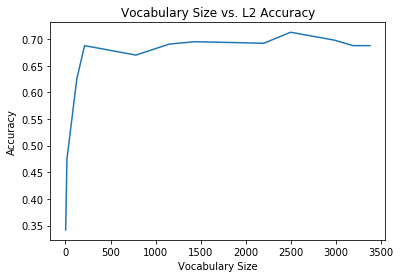

In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    ### STUDENT START ###
    vectorizer_train = CountVectorizer()
    train = vectorizer_train.fit_transform(train_data).toarray()
    full_vocab = vectorizer_train.get_feature_names()

    c_vals = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 5, 7, 8, 10]
    nz_l2 = []
    nz_l1 = []
    accuracies = []
    vocab_sizes = []

    for c in c_vals:
        clf_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear', multi_class='auto', tol=0.015).fit(train, train_labels)
        clf_l1 = LogisticRegression(penalty='l1', C=c, solver='liblinear', multi_class='auto', tol=0.015).fit(train, train_labels)
        nz_l2.append(np.count_nonzero(clf_l2.coef_))
        nz_l1.append(np.count_nonzero(clf_l1.coef_))

        vals = [ sum(abs(row[i]) for row in clf_l1.coef_) for i in range(len(clf_l1.coef_[0])) ]

        l1_vocab = []
        for word, val in zip(full_vocab, vals):
            if val > 0:
                l1_vocab.append(word)

        vocab_sizes.append(len(l1_vocab))

        vectorizer_nv = CountVectorizer(vocabulary = l1_vocab)
        train_nv = vectorizer_nv.fit_transform(train_data).toarray()
        vectorizer_nv_dev = CountVectorizer(vocabulary = l1_vocab)
        dev_nv = vectorizer_nv_dev.fit_transform(dev_data).toarray()

        clf_l2_nv = LogisticRegression(C=c, penalty='l2', solver='liblinear', multi_class='auto', tol=0.015).fit(train_nv, train_labels)
        score = clf_l2_nv.score(dev_nv, dev_labels)
        accuracies.append(score)

    data = np.array([nz_l2, nz_l1, vocab_sizes, accuracies])
    data = np.round(data,2)
    data = np.stack(data, axis=1)

    cols = ["Nonzero L2 weights", "Nonzero L1 weights", "Vocabulary size", "New L2 Accuracy"]
    row_format ="{:>20}" * (len(cols)+1)
    print(row_format.format("", *cols))
    for arg, row in zip(c_vals, data):
        print(row_format.format(arg, *row))
    
    plt.plot(vocab_sizes, accuracies)
    plt.title('Vocabulary Size vs. L2 Accuracy')  
    plt.ylabel('Accuracy') 
    plt.xlabel('Vocabulary Size') 
    plt.show()
    ### STUDENT END ###
P6()

### Part 7:

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [9]:
def P7():
### STUDENT START ###
    vectorizer = TfidfVectorizer()
    train = vectorizer.fit_transform(train_data).toarray()
    train_words = vectorizer.get_feature_names()

    clf = LogisticRegression(penalty='l2', C=100, solver='liblinear', multi_class='auto').fit(train, train_labels)

    vectorizer_dev = TfidfVectorizer(vocabulary = train_words)
    dev = vectorizer_dev.fit_transform(dev_data).toarray()

    clf_pred = clf.predict(dev)
    clf_prob = clf.predict_proba(dev)
    accuracy = metrics.f1_score(dev_labels, clf_pred, average='weighted')
    print('TFID Accuraccy  . . . . .  {0}\n'.format(round(accuracy,4))) 

    r = []
    correct = []
    max_label = []

    for i in range(dev.shape[0]):
        max_pred_prob = clf_prob[i].max()
        maxind = np.where(clf_prob[i] == max_pred_prob)[0][0]
        max_lab = newsgroups_train.target_names[maxind]
        max_label.append(max_lab)
        correct_label_ind = dev_labels[i]
        correct_label = newsgroups_train.target_names[correct_label_ind]
        correct.append(correct_label)
        prob_correct = clf_prob[i][correct_label_ind]
        r.append(max_pred_prob / prob_correct)

    r_sorted = sorted(r, reverse = True)

    for i in range(3):
        ind = r.index(r_sorted[i])
        correct_label = correct[ind]
        incorrect_label = max_label[ind]
        print("Document r  . . . . . {0}".format(r_sorted[i]))
        print("Correct label  . . . . . {0}".format(correct_label))
        print("Max probability label . . . . . {0}".format(incorrect_label))
        print(dev_data[ind])
        print("\n . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n")


## STUDENT END ###
P7()

TFID Accuraccy  . . . . .  0.7568

Document r  . . . . . 1010.9216066181967
Correct label  . . . . . talk.religion.misc
Max probability label . . . . . comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for

ANSWER: I'm noticing that two of the three examples have a correct label of religion and both contain the phrase "Book of Mormon". Perhaps collapsing that phrase to one word, e.g. "BookofMormon" would more correctly identify these examples. They also both contain the word "ftp" which seems to be a feature highly indicative of comp.graphics.

### Part 8 EXTRA CREDIT:

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [10]:
def preprocessing(s):
    lowercase = s.lower()
    bom = re.sub('book of mormon','bookofmormon', s)
    return(bom)

print("Evaluating without preprocessor")
vectorizer_train_nopp = TfidfVectorizer()
train_nopp = vectorizer_train_nopp.fit_transform(train_data).toarray()
train_nopp_words = vectorizer_train_nopp.get_feature_names()
    
## Apply feature extraction to dev data, using training vocabulary
vectorizer_dev_nopp = CountVectorizer(vocabulary = train_nopp_words)
dev_nopp_data = [empty_preprocessor(i) for i in dev_data]
dev_nopp = vectorizer_dev_nopp.fit_transform(dev_nopp_data).toarray()
clf_nopp = LogisticRegression(penalty='l2', solver='liblinear', multi_class='auto').fit(train_nopp, train_labels)
label_pred_nopp = clf_nopp.predict(dev_nopp)
F1_nopp = metrics.f1_score(dev_labels, label_pred_nopp, average="weighted")
print("No preprocessing  . . . .  F1 = {0}\n".format(F1_nopp))

print("Evaluating with better preprocessor")
vectorizer_train_pp = TfidfVectorizer()
train_pp_data = [preprocessing(i) for i in train_data]
train_pp = vectorizer_train_pp.fit_transform(train_pp_data).toarray()
train_pp_words = vectorizer_train_pp.get_feature_names()
    
## Apply feature extraction to dev data, using training vocabulary
vectorizer_dev_pp = TfidfVectorizer(vocabulary = train_pp_words)
dev_pp_data = [preprocessing(i) for i in dev_data]
dev_pp = vectorizer_dev_pp.fit_transform(dev_pp_data).toarray()
clf_pp = LogisticRegression(penalty='l2', solver='liblinear', multi_class='auto').fit(train_pp, train_labels)
label_pred_pp = clf_pp.predict(dev_pp)
F1_pp = metrics.f1_score(dev_labels, label_pred_pp, average="weighted")
print("Better preprocessing  . . . .  F1 = {0}".format(F1_pp))

## Re print 3 highest r examples
clf_pred = clf_pp.predict(dev_pp)
clf_prob = clf_pp.predict_proba(dev_pp)

r = []
correct = []
max_label = []

for i in range(dev_pp.shape[0]):
    max_pred_prob = clf_prob[i].max()
    maxind = np.where(clf_prob[i] == max_pred_prob)[0][0]
    max_lab = newsgroups_train.target_names[maxind]
    max_label.append(max_lab)
    correct_label_ind = dev_labels[i]
    correct_label = newsgroups_train.target_names[correct_label_ind]
    correct.append(correct_label)
    prob_correct = clf_prob[i][correct_label_ind]
    r.append(max_pred_prob / prob_correct)

r_sorted = sorted(r, reverse = True)

for i in range(3):
    ind = r.index(r_sorted[i])
    correct_label = correct[ind]
    incorrect_label = max_label[ind]
    print("Document r  . . . . . {0}".format(r_sorted[i]))
    print("Correct label  . . . . . {0}".format(correct_label))
    print("Max probability label . . . . . {0}".format(incorrect_label))
    print(dev_pp_data[ind])
    print("\n . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .\n")


Evaluating without preprocessor
No preprocessing  . . . .  F1 = 0.6555010846883096

Evaluating with better preprocessor
Better preprocessing  . . . .  F1 = 0.7032556685225355
Document r  . . . . . 8.367829377734218
Correct label  . . . . . talk.religion.misc
Max probability label . . . . . comp.graphics
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

Document r  . . . . . 4.763303856881386
Correct label  . . . . . talk.religion.misc
Max probability label . . . . . comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"

I decided not to take out "ftp" from the vocabulary since it appearing in religious texts isn't enough of a reason to remove it. However, even just lowercasing and concatenating "book of mormon" increased the F1 score by 5 points. Similar texts are in the top 3 mis-labeled examples but their r scores are much lower (from 1010 to 8).